# Math 151B Homework No. 3

* Brandon Loptman  
* UID: 604105043  
* February 3, 2020

In [104]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## Section 5.5 

Below we implement the Runge-Kutta-Felhberg method. It will be used to approximate solutions to ODEs in the following problems.

In [86]:
def RKF(f, a, b, y_0, tol, h_max, h_min):
    """
    """
    t = a
    w = y_0
    h = h_max
    flag = 1
    d = 0
    
    T = np.array([t])
    Y = np.array([w])
    H = np.array([h])
    
    #print(T)
    #print(Y)
    #print(H)
    
    while flag == 1:
        k1 = h*f(t,w)
        k2 = h*f(t + .25*h, w + .25*k1)
        k3 = h*f(t + (3/8)*h, w + (3/32)*k1 + (9/32)*k2)
        k4 = h*f(t + (12/13)*h, w + (1932/2197)*k1 - (7200/2197)*k2 + (7296/2197)*k3)
        k5 = h*f(t + h, w + (439/216)*k1 - 8*k2 + (3680/513)*k3 - (845/4104)*k4)
        k6 = h*f(t + .5*h, w - (8/27)*k1 + 2*k2 - (3544/2565)*k3 + (1859/4104)*k4 - (11/40)*k5)
        
        R = (1/h)*np.abs((1/360)*k1 - (128/4275)*k3 - (2197/75240)*k4 + (1/50)*k5 + (2/55)*k6)
        
        #print("R = ", R)
        
        if R <= tol:
            t = t + h
            w = w + (25/216)*k1 + (1408/2565)*k3 + (2197/4104)*k4 - (1/5)*k5
            
            T = np.append(T,t)
            Y = np.append(Y,w)
            H = np.append(H,h)
            
            #print("appended arrays")
        
        d = .84*(tol/R)**.25
        #print("d = ", d)
        
        if d <= .1:
            h = .1*h
        
        elif d >= 4:
            h = 4*h
        
        else:
            h = d*h
            
        if h > h_max:
            h = h_max
            
        if t >= b:
            flag = 0
        
        elif t + h > b:
            h = b - t 
        
        elif h < h_min:
            flag = 0
            print("minimum h exceeded!")
    
    #print("done!")
    
    return T, Y, H 

## 1.) (a)

In [133]:
def f1(t,y):
    return t*np.exp(3*t) - 2*y

def f1_exact(t):
    return (1/5)*t*np.exp(3*t) - (1/25)*np.exp(3*t) + (1/25)*np.exp(-2*t)

In [134]:
T,Y,H = RKF(f1,a = 0, b = 1, y_0 = 0, tol = 10**-4, h_max = .25, h_min = .05)

In [135]:
print("t vals: \n", T, "\n")
print("w vals: \n ", Y, "\n")
print("h vals: \n ", H, "\n")

t vals: 
 [0.         0.20939    0.38329721 0.56104685 0.71068396 0.83877443
 0.95132633 1.        ] 

w vals: 
  [0.         0.02981836 0.13432603 0.40164379 0.87083725 1.58940614
 2.61402262 3.21904974] 

h vals: 
  [0.25       0.20939    0.17390722 0.17774964 0.1496371  0.12809048
 0.1125519  0.04867367] 



In [136]:
Y_exact = f1_exact(T)
print("y vals: \n", Y_exact, "\n")

y vals: 
 [0.         0.02983366 0.13434875 0.40168601 0.87088816 1.58946002
 2.61407705 3.21909932] 



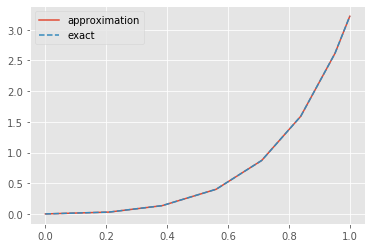

In [137]:
plt.plot(T,Y,label="approximation")
plt.plot(T,Y_exact,label = "exact",linestyle="--")

plt.legend()
plt.show()

## 2.) (a)

In [92]:
def f2(t,y):
    return (y/t)**2 + (y/t)

In [93]:
T,Y,H = RKF(f2,a = 1, b = 1.2, y_0 = 1, tol = 10**-4, h_max = .05, h_min = .02)

In [94]:
print("t vals: \n", T, "\n")
print("w vals: \n ", Y, "\n")
print("h vals: \n ", H, "\n")

t vals: 
 [1.   1.05 1.1  1.15 1.2 ] 

w vals: 
  [1.         1.10385741 1.2158864  1.33683935 1.46756971] 

h vals: 
  [0.05 0.05 0.05 0.05 0.05] 



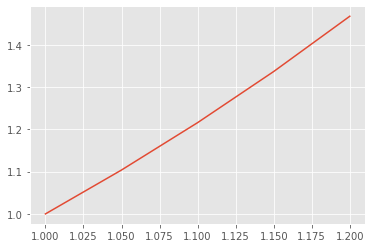

In [95]:
plt.plot(T,Y)
plt.show()

## Section 5.6

Below we implement the Adams Fourth-Order Predictor-Corrector method. It is used to approximate the solutions to ODEs in the following problem.

In [112]:
def AB_Predictor_Corrector(f, a, b, y_0, N):    
    h = (b-a)/N          
    
    #t = np.arange(a, b+h, h) 
    t = np.array([a + n * h for n in range(N + 1)])
    
    y = np.zeros((N+1,)) 
    
    y[0] = y_0         

    for i in range(0,N):
        if i in range(0,3):
            k1 = h * f(t[i],y[i])
            k2 = h * f(t[i] + (h/2.0), y[i] +(k1/2.0))
            k3 = h * f(t[i] + (h/2.0), y[i] + (k2/2.0))
            k4 = h * f(t[i] + h, y[i] + k3)
        
            y[i + 1] = y[i] + (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
            
        else:
            
             y[i + 1] = y[i] + h*(55.0 * f(t[i],y[i]) - 59.0 * f(t[i-1],y[i-1]) + 37.0 * f(t[i-2],y[i-2]) - 9.0 * f(t[i-3],y[i-3]))/24.0
             
             
             y[i + 1] = y[i] + h*(9.0 * f(t[i+1], y[i + 1]) + 19.0 * f(t[i],y[i]) - 5.0 * f(t[i-1],y[i-1]) + f(t[i-2],y[i-2]))/24.0
             
    return (t,y)

## 5.)

## (a)

t vals:  [0.  0.2 0.4 0.6 0.8 1. ]
w vals:  [0.         0.02690591 0.15104685 0.49664786 1.3408657  3.24508812]
y vals:  [0.         0.0268128  0.15077784 0.49601957 1.33085703 3.21909932]


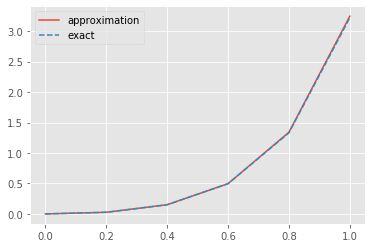

In [138]:
T,Y = AB_Predictor_Corrector(f1,0,1,0,5)
Y_exact = f1_exact(T)

print("t vals: ", T)
print("w vals: ", Y)
print("y vals: ", Y_exact)

plt.plot(T,Y,label="approximation")
plt.plot(T,Y_exact,label="exact",linestyle="--")

plt.legend()
plt.show()

## (b)

In [120]:
def f3(t,y):
    return 1 + (t-y)**2

def f3_exact(t):
    return t + 1/(1-t)

t vals:  [2.  2.2 2.4 2.6 2.8 3. ]
w vals:  [1.         1.36666096 1.68570787 1.97499411 2.24469946 2.5003083 ]
y vals:  [1.         1.36666667 1.68571429 1.975      2.24444444 2.5       ]


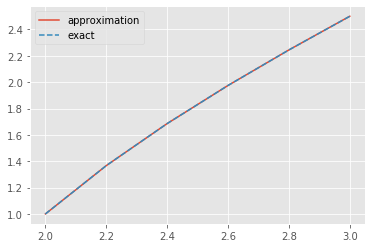

In [129]:
T,Y = AB_Predictor_Corrector(f3,2,3,1,5)
Y_exact = f3_exact(T)

print("t vals: ", T)
print("w vals: ", Y)
print("y vals: ", Y_exact)

plt.plot(T,Y,label="approximation")
plt.plot(T,Y_exact,label="exact",linestyle="--")

plt.legend()
plt.show()

## (c)

In [116]:
def f4(t,y):
    return 1 + y/t

def f4_exact(t):
    return t*np.log(t) + 2*t

t vals:  [1.  1.2 1.4 1.6 1.8 2. ]
w vals:  [2.         2.6187787  3.27104908 3.95198996 4.65799685 5.38627155]
y vals:  [2.         2.61878587 3.27106113 3.95200581 4.658016   5.38629436]


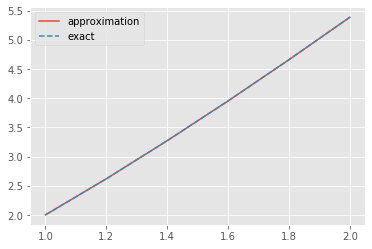

In [117]:
T,Y = AB_Predictor_Corrector(f4,1,2,2,5)
Y_exact = f4_exact(T)

print("t vals: ", T)
print("w vals: ", Y)
print("y vals: ", Y_exact)

plt.plot(T,Y,label="approximation")
plt.plot(T,Y_exact,label="exact",linestyle="--")

plt.legend()
plt.show()

## (d)

In [118]:
def f5(t,y):
    return np.cos(2*t) + np.sin(3*t)

def f5_exact(t):
    return .5*np.sin(2*t) - (1/3)*np.cos(3*t) + 4/3

t vals:  [0.  0.2 0.4 0.6 0.8 1. ]
w vals:  [1.         1.25293502 1.57123833 1.87510968 2.07966176 2.11925748]
y vals:  [1.         1.25293063 1.57122546 1.87508691 2.07891804 2.11797955]


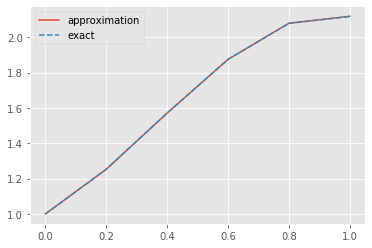

In [119]:
T,Y = AB_Predictor_Corrector(f5,0,1,1,5)
Y_exact = f5_exact(T)

print("t vals: ", T)
print("w vals: ", Y)
print("y vals: ", Y_exact)

plt.plot(T,Y,label="approximation")
plt.plot(T,Y_exact,label="exact",linestyle="--")

plt.legend()
plt.show()